In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.utils.data as data
import cv2
import matplotlib.pyplot as plt

In [2]:
train_set = datasets.ImageFolder('data/train/', transform=transforms.ToTensor())

In [3]:
train_loader = data.DataLoader(train_set, batch_size=32, shuffle=True)

In [4]:
from model.resnet import ResNet, Bottleneck

In [5]:
r = ResNet(Bottleneck, [1, 1, 1, 1]).cuda()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(r.parameters())

In [7]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        if i % 200 == 49: 
            print("-- ITERATION:", i)
        input, target = data

        # wrap input + target into variables
        input_var = input.cuda()
        target_var = target.cuda()
        
        print(target_var)
            # compute output
        output = r(input_var)
        print(output.shape)
        loss = criterion(output, target_var)
        
        # computer gradient + sgd step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print progress
        running_loss += loss.item()
            
            
        if i % 200 == 49:  # print every 2k mini-batches
            print(running_loss / 50)
            running_loss = 0.

tensor([ 84,  91,  50, 192,  36, 113,  31,  71, 109,  77,  55, 140, 108, 138,
        121, 115,  50,  10,  19, 103,  70,  30, 101,  10, 108,  21,  10, 118,
         72,  85,  25,  43], device='cuda:0')
torch.Size([32, 200])
tensor([ 36, 113, 181, 199, 112, 185,  69, 111, 118,  85,  33,  73, 135, 137,
          0,  74,  40,  49,   7,  22,  79,  75, 132,  49,  38,  21, 185,  99,
        168, 191, 107,  22], device='cuda:0')
torch.Size([32, 200])
tensor([140,  75,  14, 185, 124,  80,  31,  98,  23, 170,  59,  64, 108, 181,
        160, 102,  65,  46,  65,  26,  85,  34, 120,  85, 123, 160,  70, 156,
        187, 182,  51,  93], device='cuda:0')
torch.Size([32, 200])
tensor([175, 134,  76, 143,  99, 132,  80,  79, 152, 123,  54, 161, 129, 111,
        183,  76, 183,  19, 175, 149, 159, 170, 110, 180, 110,  42, 136, 120,
        104, 127,  32, 194], device='cuda:0')
torch.Size([32, 200])
tensor([ 91,  44, 119, 150, 148, 160,  94,  98, 139,  83, 141, 115, 185,  45,
         55,  87, 158,   2

KeyboardInterrupt: 

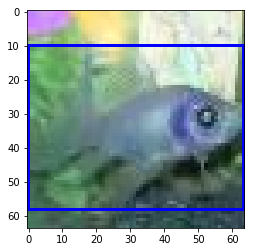

In [4]:
img = cv2.imread('data/train/n01443537/images/n01443537_0.JPEG')

f = open('data/train/n01443537/n01443537_boxes.txt')
l = f.readline()
l = l.split('\t')[1:]
l = [int(i) for i in l]

img = cv2.rectangle(img, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 1)
plt.imshow(img)
plt.show()

In [3]:
??datasets.ImageFolder

Init signature: datasets.ImageFolder(root, transform=None, target_transform=None, loader=<function default_loader at 0x7f0ebe178598>)
Source:        
class ImageFolder(DatasetFolder):
    """A generic data loader where the images are arranged in this way: ::

        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/xxz.png

        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/asd932_.png

    Args:
        root (string): Root directory path.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        loader (callable, optional): A function to load an image given its path.

     Attributes:
        classes (list): List of the class names.
        class_to_idx (dict): Dict with items (class_name, class_index).
        imgs (lis